In [18]:
import sys
import os
sys.path.append(os.path.abspath("../.."))
import numpy as np
import pandas as pd
import numpy as np
from tinyshift.stats import assess_comparability
from tinyshift.plot import power_curve, power_vs_allocation, forest_plot

In [19]:
def cohen_d(group1_mean: float, group2_mean: float, pooled_std: float) -> float:
    """
    Calculates Cohen's d effect size for two group means.
    
    Parameters
    ----------
    group1_mean : float
        Mean of the first group.
    group2_mean : float
        Mean of the second group.
    pooled_sd : float
        Pooled standard deviation of both groups.
        
    Returns
    -------
    float
        Cohen's d effect size.
    """
    if pooled_std <= 0:
        raise ValueError("Pooled standard deviation must be greater than zero.")
    
    return abs(group1_mean - group2_mean) / pooled_std

In [20]:
effect_size = cohen_d(160, 145, 45)
effect_size

0.3333333333333333

In [21]:
np.random.seed(42)

def generate_synthetic_data(n_samples=1500):
    group = np.random.choice(['control', 'treatment1', 'treatment2'], n_samples, p=[0.33, 0.33, 0.34])
    
    gender = []
    age_means = []
    
    for g in group:
        if g == 'control':
            gender.append(np.random.choice(['M', 'F'], p=[0.5, 0.5]))
            age_means.append(35)  
        elif g == 'treatment1':
            gender.append(np.random.choice(['M', 'F'], p=[0.55, 0.45]))
            age_means.append(36)  
        else:  # treatment2
            gender.append(np.random.choice(['M', 'F'], p=[0.25, 0.75]))
            age_means.append(32) 
    
    age = []
    for i, g in enumerate(group):
        if g == 'control':
            age.append(np.random.normal(35, 12))
        elif g == 'treatment1':
            age.append(np.random.normal(36, 12))
        else:  # treatment2
            age.append(np.random.normal(32, 13))
    
    age = np.array(age)
    age = np.clip(age, 18, 70) 
    
    gender = pd.Series(gender).map({'M': 1, 'F': 0})

    return pd.DataFrame({
        'gender': gender,
        'age': age,
        'group': group,
    })

df = generate_synthetic_data(1500)

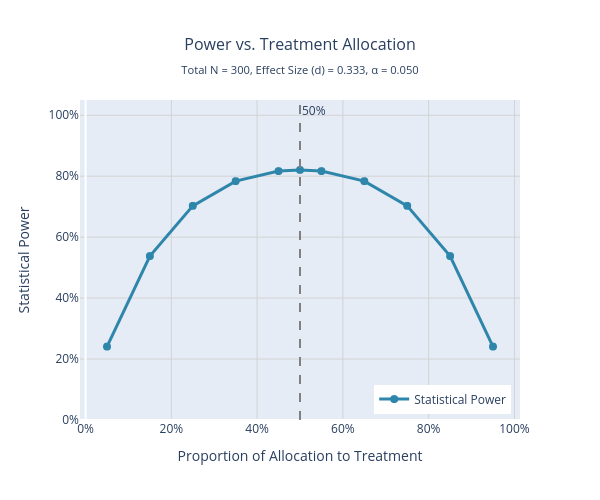

In [22]:
fig_allocation = power_vs_allocation(
    effect_size=effect_size,
    sample_size=300,
    alpha=0.05,
    fig_type='png'
)
fig_allocation

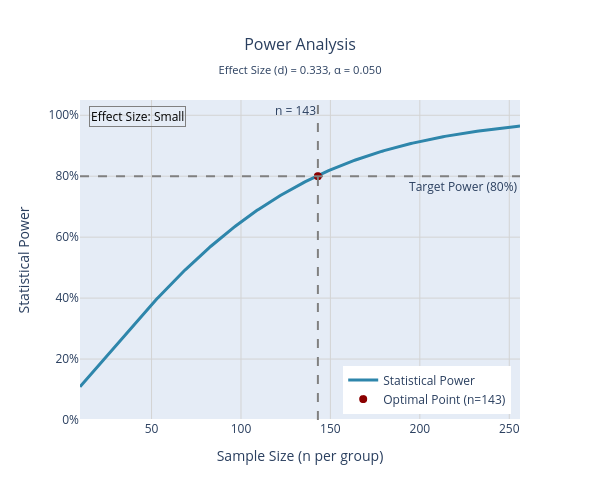

In [23]:
fig = power_curve(
    effect_size=effect_size,
    alpha=0.05,
    power_target=0.80,
    fig_type='png'
)
fig

In [24]:
assess_comparability(df, features=["gender", "age"], treatment=['treatment1', 'treatment2'], control='control')

,group,feature,cohen_d
0,treatment1,gender,0.158026
1,treatment1,age,0.011620
2,treatment2,gender,0.503795
3,treatment2,age,0.290087


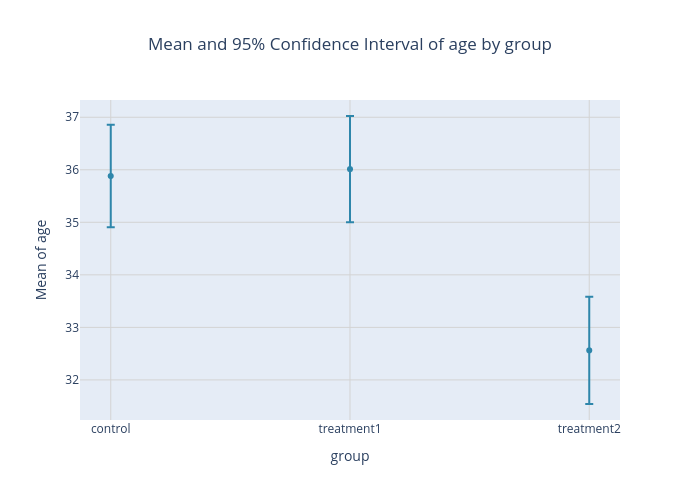

In [25]:
forest_plot(df, feature='age', group_col='group', confidence=0.95, fig_type='png')